# **

In [ ]:
import numpy as np
from numpy import linalg

v = np.array([1, -1, 2]).reshape(3, 1)
normV = 2 / np.linalg.norm(v)**2
print(normV)
vv = normV * (v.dot(v.T))
print('\nvv : ', vv)
I = np.array([1,0,0,0,1,0,0,0,1]).reshape(3, 3)
print ('\n', I)
print('\n', I - vv)

0.33333333333333337

vv :  [[ 0.33333333 -0.33333333  0.66666667]
 [-0.33333333  0.33333333 -0.66666667]
 [ 0.66666667 -0.66666667  1.33333333]]

 [[1 0 0]
 [0 1 0]
 [0 0 1]]

 [[ 0.66666667  0.33333333 -0.66666667]
 [ 0.33333333  0.66666667  0.66666667]
 [-0.66666667  0.66666667 -0.33333333]]


In [ ]:
import numpy as np

Q = np.array ([[0, 0.5, 0.5, 0.5, 0, 0],
               [0.5, 0, 0.5, 0, 0, 0], 
               [0.5, 0.5, 0, 0, 0, 0], 
               [0, 0, 0, 0, 0, 0], 
               [0, 0, 0, 0.5, 0, 1], 
               [0, 0, 0, 0, 1, 0]])
print(Q[:,0].sum())
One = np.ones(len(Q)**2).reshape(len(Q), len(Q))
a = 0.85
I = a * Q + (1 - a) * (1/len(Q)) * One
#print(I)
l, r = np.linalg.eig(I)
print ('Values : ', l.round(decimals=3))
print ('\nVectors : ', -r[:, 0])

1.0
Values :  [ 1.     0.85  -0.    -0.85  -0.425 -0.425]

Vectors :  [0.44679089 0.42972886 0.42972886 0.05720797 0.46900226 0.45585989]


# Page Ranking


dG : 
      G  A1  A2  A3  B1  B2  B3  D1  D2  E1  E2  E3
0   A1   0   1   0   0   0   0   0   1   0   0   0
1   A2   0   0   1   0   0   0   0   0   0   1   0
2   A3   0   0   0   0   0   0   0   0   0   0   0
3   B1   0   0   0   0   1   0   0   0   0   1   0
4   B2   0   0   0   0   0   1   0   0   0   0   0
5   B3   0   0   0   0   0   0   0   0   0   0   0
6   D1   0   1   0   0   0   0   0   1   0   0   0
7   D2   0   0   0   0   0   1   0   0   0   0   0
8   E1   0   0   1   0   0   0   0   0   0   1   0
9   E2   0   0   1   0   1   0   0   0   0   0   0
10  E3   0   0   0   0   1   0   0   0   0   1   0


/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


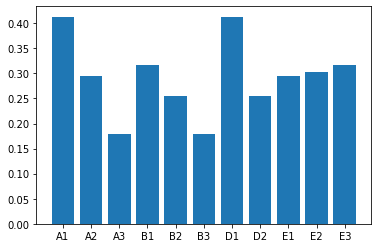

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/DataSets/DirectedGraph.csv', header=0)
GG = pd.read_csv('/content/drive/MyDrive/DataSets/DirectedGraph.csv')

df = df.set_index('G')
dG = df.to_numpy(dtype=np.float16)

print('\nGG : \n', GG)

for i in range(len(dG)):
  sumCol = dG[:, i].sum()
  if sumCol == 0:
    dG[:, i] += (1/len(dG))
  else:
    dG[:, i] /= sumCol
#print('\n', dG)
One = np.ones(len(dG)**2).reshape(len(dG), len(dG))
a = 0.85
I = a * dG + (1 - a) * (1/len(dG)) * One
l, r = np.linalg.eig(I)
#print('\n', I)
#print ('\nValues : ', l)
#print ('\nVectors : ', -r[:, 0])
plt.bar(df.columns, -r[:, 0])
plt.show()

# All Orthognall

In [ ]:
#!pip install tensorly

import numpy as np
import tensorly as tl
from tensorly import unfold, fold

def All_orthogonal (A) :
  for d in range(len(A.shape)) :
    for i in range(A.shape[d]):
      for j in range(A.shape[d]):
        if i != j :
          B1 = (A[i, :, :].dot(A[j, : , :].T)).trace()
          B2 = A[: , i, :].dot(A[:, j , :].T).trace()
          B3 = A[:, :, i].dot(A[:, : , j].T).trace()
          if B1 != 0 or B2 != 0 or B3 != 0 :
            print('No All Orthognall !')
            break
  return '\n*** All Orthogonal ***'
  # end def All_orthogonal

O = np.array([1, 0, 0, 1, 0, 1, 1, 0]).reshape(2, 2, 2)
print(O)
print(All_orthogonal(O))
print('\n')
print('*'*100)
print('\n')

def Unfold (A, mod):
  if mod == 1 :
    A = np.hstack([A[:, :, i].T for i in range(A.shape[2])])
  elif mod == 2 :
    A = np.hstack([A[i, :, :].T for i in range(A.shape[0])])
  elif mod == 3 :
    A = np.hstack([A[:, i, :] for i in range(A.shape[1])])
  else :
    print('Mod no matched ..!')
  return A
  # End def Unfold

A = np.array([3,2,0,1,5,0,4,3,2,2,-3,1]).reshape(3, 2, 2)
print(A)
print('\n')
print('\nUnfold Mod 1 : \n', Unfold(A, 1))
print('\nUnfold Mod 2 : \n', Unfold(A, 2))
print('\nUnfold Mod 3 : \n', Unfold(A, 3))

#print('\n', unfold(A, 1)) # ?
#print('\n', unfold(A, 0)) # 3
#print('\n', unfold(A, 2)) # 2

[[[1 0]
  [0 1]]

 [[0 1]
  [1 0]]]

*** All Orthogonal ***


****************************************************************************************************


[[[ 3  2]
  [ 0  1]]

 [[ 5  0]
  [ 4  3]]

 [[ 2  2]
  [-3  1]]]



Unfold Mod 1 : 
 [[ 3  5  2  2  0  2]
 [ 0  4 -3  1  3  1]]

Unfold Mod 2 : 
 [[ 3  0  5  4  2 -3]
 [ 2  1  0  3  2  1]]

Unfold Mod 3 : 
 [[ 3  2  0  1]
 [ 5  0  4  3]
 [ 2  2 -3  1]]


# Word & Sentence Exteraction

In [ ]:
#!pip install PyPDF2

import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
import PyPDF2

"""
def ReadPDF ():

  pdfFileObj = open("/content/Story.pdf", 'rb')
  pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  num_page = pdfReader.getNumPages()
  txt = ''
  for i in range(num_page):
    pageObj = pdfReader.getPage(i)
    txt += pageObj.extractText()

  txt = txt.replace('\n', '')
  docs = txt.split('. ')
  #print('+'*100)
  #print(txt)
  #print('+'*100)
  docs_array = np.array(docs)
  #print('\nText to array : \n', docs)
  #print('\nShape Text : ', docs_array.shape, '\n')
  vec = CountVectorizer()
  X = vec.fit_transform(docs)
  #print(X)
  txtArray = np.array(pd.DataFrame(X.toarray(), columns=vec.get_feature_names())).T
  #print(txtArray)
  return docs_array, txtArray
  #end def
"""

def Non_Neg_Matrix(matrix, k=3):
  model = NMF(n_components=k, init='random', random_state=0)
  C = model.fit_transform(matrix)
  D = model.components_
  print('Matrix : ', A.shape)
  print('C      : ', C.shape)
  print('D      : ', D.shape)
  return C, D
  #end def

def Max_norm(matrix, p=0):
  max = 0
  loc = 0
  for i in range(matrix.shape[1]):
    norm = Get_Norm(matrix[:,i], p)
    if norm > max :
      max = norm
      loc = i
  return max, loc
  #end def

def Get_Norm (v, p=0):
  norm = np.sqrt(np.sum(np.power(v, 2)))
  if p : print('Euclidean Norm is : %.3f' % norm)
  return norm
  #end def 

def HouseHolder(a):
  x = np.zeros(a.size)
  print(x)
  x[0] = Get_Norm(a)
  v = (x - a).reshape(a.size, 1)
  I = np.eye(a.shape[0])
  H = I - (2 * v.dot(v.T)) / Get_Norm(v)**2
  return H

def Permutation_Matrix(matrix, p=0):
  _, loc = Max_norm(matrix, p)
  I = np.eye(matrix.shape[1], dtype=np.int8)
  Col = I[:,loc].reshape(I.shape[0], 1)
  Del_Max_norm = np.delete(I, loc, axis=1)
  new_I = np.concatenate((Col, Del_Max_norm),axis=1)  
  return loc, new_I
  #end def

A = np.array([[1, 3, 4, 6, 2], 
              [2, 5, 2, 4, 3], 
              [7, 1, 0, 6, 9], 
              [4, 5, 0, 3, 0], 
              [1, 7, 3, 5, 5], 
              [0, 4, 0, 8, 0], 
              [6, 1, 2, 4, 4]], dtype=np.float16)


K = 4
#Atxt, A = ReadPDF()
Col = np.zeros(K, dtype=int)
C, D = Non_Neg_Matrix(A, K)

#print('Main Matrix :\n', A)
print('\n ***Start Exteraction : ***\n')
for i in range(K):
  I = np.eye(A.shape[1])
  Col[i], P = Permutation_Matrix(D[i:, i:])
  I[i:, i:] = P

  A = A.dot(I)
  print('\n', A)

  D[i:, i:] = D[i:, i:].dot(P)
  H = HouseHolder(D[i:, i:])
  Q = np.eye(K)
  Q[i:, i:] = H 

  C = C.dot(Q.T) # CQt
  D = Q.dot(D) # QDP

#Col_sorted = sorted(Col)
#print(Col_sorted)

#for i in range(K):
#  print(Atxt[Col_sorted[i]])

# word & term matrix

In [ ]:
!pip install PyPDF2

import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
import PyPDF2


def ReadPDF ():

  pdfFileObj = open("/content/Story.pdf", 'rb')
  pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  num_page = pdfReader.getNumPages()
  txt = ''
  for i in range(num_page):
    pageObj = pdfReader.getPage(i)
    txt += pageObj.extractText()

  txt = txt.replace('\n', '')
  docs = txt.split('. ')
  docs_array = np.array(docs)
  vec = CountVectorizer()
  X = vec.fit_transform(docs)
  txtArray = np.array(pd.DataFrame(X.toarray(), columns=vec.get_feature_names())).T
  return docs_array, txtArray
  #end def

"""
A = np.array([[1, 3, 4, 6, 2], 
              [2, 5, 2, 4, 3], 
              [7, 1, 0, 6, 9], 
              [4, 5, 0, 3, 0], 
              [1, 7, 3, 5, 5], 
              [0, 4, 0, 8, 0], 
              [6, 1, 2, 4, 4]])
"""

def Non_neg_matrix(matrix, K=3):
  model = NMF(n_components=K)
  C = model.fit_transform(matrix)
  D = model.components_
  print('Matrix : ', A.shape)
  print('C      : ', C.shape)
  print('D      : ', D.shape)
  print('\n')
  return C, D
  #end def

def Max_norm(matrix, p=0):
  max = 0
  loc = 0
  for i in range(matrix.shape[1]):
    norm = Get_Norm(matrix[:,i], p)
    if norm > max :
      max = norm
      loc = i
  return max, loc
  #end def

def Get_Norm (v, p=0):
  norm = np.sqrt(np.sum(np.power(v, 2)))
  if p : print('Euclidean Norm is : %.3f' % norm)
  return norm
  #end def 

def HouseHolder(a):
  x = np.zeros(a.size)
  x[0] = Get_Norm(a)
  v = (x - a).reshape(a.size, 1)
  I = np.eye(a.shape[0])
  H = I - (2 * v.dot(v.T)) / Get_Norm(v)**2
  return H

def Permutation_matrix(D):
  _, loc = Max_norm(D)
  I = np.eye(D.shape[1])
  v = I[:, loc].reshape(D.shape[1], 1)
  I = np.delete(I, loc, axis=1)
  I = np.concatenate((v, I), axis=1)
  return loc, I

K = 25
loc_col = np.ones(K)
_, A = ReadPDF()
C, D = Non_neg_matrix(A, K)

for i in range(K- 1):
  P = np.eye(A.shape[1])
  loc_col[i], P[i:, i:] = Permutation_matrix(D[i:, i:])
  A = A.dot(P)
  DP = D.dot(P)
    
  Q = np.eye(DP.shape[0])
  Q[i:, i:] = HouseHolder(DP[i:, 0])
  print('\n', Q.round(decimals=2))
  C = C.dot(Q.T)
  D = Q.dot(DP)

#print(np.sort(loc_col))

Matrix :  (311, 50)
C      :  (311, 25)
D      :  (25, 50)



 [[-0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0.  0.
   0.  0.  0.  0.  0. -0. -0.]
 [ 0.  0.  0.  0.  0.  0. -0.  1. -0.  0. -0.  0.  0. -0. -0. -0.  0.  0.
   0.  0.  0.  0.  0. -0. -0.]
 [ 0.  0.  0.  0.  0.  0. -0. -0.  1.  0. -0.  0.  0. -0. -0. -0.  0.  0.
   0.  0.  0.  0.  0. -

# QR matrix

In [ ]:
import numpy as np


A = np.array([[1, 3, 4, 6, 2], 
              [2, 5, 2, 4, 3], 
              [7, 1, 0, 6, 9], 
              [4, 5, 0, 3, 0], 
              [1, 7, 3, 5, 5], 
              [0, 4, 0, 8, 0], 
              [6, 1, 2, 4, 4]])

def Get_Norm (v, p=0):
  norm = np.sqrt(np.sum(np.power(v, 2)))
  if p : print('Euclidean Norm is : %.3f' % norm)
  return norm

def HouseHolder(a):
  x = np.zeros(a.size)
  x[0] = Get_Norm(a)
  v = (x - a).reshape(a.size, 1)
  I = np.eye(a.shape[0])
  H = I - (2 * v.dot(v.T)) / Get_Norm(v)**2
  return H

def QR(A):
  m, n = A.shape
  Q = np.eye(m)
  for i in range(n):
    H = np.eye(m)
    H[i:, i:] = HouseHolder(A[i:, i])
    A = H.dot(A)
    Q = Q.dot(H)
  return Q, A
 

Q, R = QR(A) # My Function
q, r = np.linalg.qr(A) # Python numpy Package

print('A : \n', A)
print('\nQ matrix : \n', Q.round(decimals=3))
print('\nR matrix : \n', R.round(decimals=3))

QQt = Q.dot(Q.T)
print('\nQQt : \n', QQt.round(decimals=3))

print('\nKian Function : %.15f' % np.linalg.norm(A - Q.dot(R)))
print('Python Package: %.15f' % np.linalg.norm(A - q.dot(r)))

A : 
 [[1 3 4 6 2]
 [2 5 2 4 3]
 [7 1 0 6 9]
 [4 5 0 3 0]
 [1 7 3 5 5]
 [0 4 0 8 0]
 [6 1 2 4 4]]

Q matrix : 
 [[ 0.097  0.251  0.719  0.284 -0.246 -0.492  0.166]
 [ 0.193  0.401  0.054 -0.179  0.084 -0.116 -0.864]
 [ 0.677 -0.247 -0.165  0.293  0.521 -0.306  0.057]
 [ 0.387  0.302 -0.459 -0.357 -0.51  -0.302  0.264]
 [ 0.097  0.651  0.145 -0.223  0.497  0.316  0.386]
 [ 0.     0.401 -0.329  0.788 -0.199  0.259 -0.052]
 [ 0.58  -0.197  0.336 -0.054 -0.338  0.626 -0.047]]

R matrix : 
 [[10.344  5.124  2.223  9.377  9.667]
 [ 0.     9.987  3.365  8.206  1.949]
 [ 0.    -0.     4.091  1.598  2.187]
 [ 0.    -0.    -0.     6.647  1.332]
 [ 0.    -0.    -0.    -0.     5.584]
 [-0.    -0.     0.    -0.     0.   ]
 [ 0.    -0.    -0.    -0.     0.   ]]

QQt : 
 [[ 1.  0.  0.  0. -0. -0. -0.]
 [ 0.  1. -0.  0. -0. -0.  0.]
 [ 0. -0.  1.  0. -0.  0. -0.]
 [ 0.  0.  0.  1. -0. -0. -0.]
 [-0. -0. -0. -0.  1.  0.  0.]
 [-0. -0.  0. -0.  0.  1. -0.]
 [-0.  0. -0. -0.  0. -0.  1.]]

Kian Function 

# Polar Decomposition

In [ ]:
import numpy as np
from numpy.linalg import svd
from scipy.linalg import polar


def Gram_matrix(A):
  G = np.zeros(A.shape, dtype=int)
  for i in range(len(A)):
    for j in range(len(A)):
      G[i, j] = np.dot(A[:, i], A[:, j].T)
  return G

A = np.array([7,8,5,4,9,6,5,1,6,8,1,5,7,0,3,4]).reshape(4, 4)
print(A)

U, P = polar(A)

u, s, vt = svd(A)
s = np.diag(s)
Psvd = np.dot(vt.T, np.dot(s, vt))

#print('\nPolar decomposition : ')
#print('U : \n', U)
#print('P : \n', P)
#print('\nuse SVD to Polar decomposition : ')
#print('U_u.vt : \n', np.dot(u, vt))
#print('P_v.s.vt : \n', Psvd)

print('P - Psvd : %.14f' %np.linalg.norm(Psvd - P))
print('\nGram Matrix is : \n', Gram_matrix(P))

[[7 8 5 4]
 [9 6 5 1]
 [6 8 1 5]
 [7 0 3 4]]
P - Psvd : 0.00000000000001

Gram Matrix is : 
 [[215 158 107  95]
 [158 164  78  78]
 [107  78  60  42]
 [ 95  78  42  58]]


# Matrix Matching

In [ ]:
from itertools import islice


small=[[1,2,3],
       [4,5,6],
       [7,8,9]]

big=[[2,4,2,3,5],
     [6,0,1,9,0],
     [2,8,2,1,0],
     [7,7,4,2,1]]

"""
def difference(small, matrix):
    l = len(small)
    return sum([abs(small[i][j] - matrix[i][j]) for i in range(l) for j in range(l)])
def getSubmatrices(big, smallLength):
    submatrices = []
    bigLength = len(big)
    step = (bigLength // smallLength) + 1
    for i in range(smallLength):
        for j in range(step):
            tempMatrix = [big[j+k][i:i+smallLength] for k in range(smallLength)]
            submatrices.append([i+1,j+1,tempMatrix])
    return submatrices
def minDiff(small, big):
    submatrices = getSubmatrices(big, len(small))
    diffs = [(x,y, difference(small, submatrix)) for x, y, submatrix in submatrices]
    minDiff = min(diffs, key=lambda elem: elem[2])
    return minDiff
y, x, diff = minDiff(small, big)
print("Minimum difference: ", diff)
print("X = ", x)
print("Y = ", y)
"""
print(min((sum(sum(abs(x - y) 
    for x, y in zip(a, b)) 
    for a, b in zip((islice(r, col, col + len(small[0])) 
    for r in islice(big, row, row + len(small))), small)), (row, col)) 
    for row in range(len(big) - len(small) + 1) 
    for col in range(len(big[0]) - len(small[0]) + 1)))

(24, (1, 0))


# Matrix Matching II

In [ ]:
dim = 3
K = 8
D, X = [], []

for i in range(K):
  A = (np.random.rand(dim, dim) * 10).round(decimals=0)
  X.append(A)

X = np.array(X)
print('Matrix shape : ', X.shape)

B = (np.random.rand(dim, dim) * 10).round(decimals=0)
w = np.zeros(shape=(K, dim, dim))

for k in range(K):
  for i in range(dim):
    for j in range(dim):
      w[k, i, j] = sum(abs(B[:, i] - X[k, :, j]))
  D.append(sum(sum(w[k, :, :])))

print('Min W is :', D)
print('Posision min W is :', D.index(min(D))+1)

Matrix shape :  (8, 3, 3)
Min W is : [78.0, 113.0, 79.0, 89.0, 89.0, 92.0, 68.0, 114.0]
Posision min W is : 7


# Computing Data Mining Project

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)

Matrix Train shape is :  (28, 28)
Matrix Test shape is :  (28, 28) 



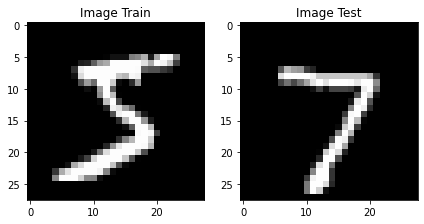

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract


In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.pylab import figure
import numpy as np
from numpy.linalg import svd
from scipy.linalg import polar


def Polar_Decomposition (A):
  #U, P = polar(A)
  u, s, vt = svd(A)
  s = np.diag(s)
  U = np.dot(u, vt)
  P = np.dot(vt.T, np.dot(s, vt))
  return U, P

def Gram_matrix(A):  
  #G = np.dot(A.T, A)
  G = np.zeros(shape=(A.shape[1], A.shape[1]), dtype=np.float16)
  for i in range(A.shape[1]):
    for j in range(A.shape[1]):
      G[i, j] = np.dot(A[:, i].T, A[:, j])  
  return G

def Matrix_Matching(Mtrain, Mtest):
  dim = Mtrain.shape[0]
  w = np.zeros(shape=(dim, dim))
  for i in range(dim):
    for j in range(dim):
      w[i, j] = sum(abs(Mtrain[:, i] - Mtest[:, j]))
  return w

# ******************************************************************************
# start program

(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Matrix_train = trainX[0]
Matrix_test = testX[0]

print('\nMatrix Train shape is : ', Matrix_train.shape)
print('Matrix Test shape is : ', Matrix_test.shape, '\n')

fig = plt.figure(figsize=(7, 7))

fig.add_subplot(1, 2, 1)
plt.title('Image Train')
plt.imshow(Matrix_train, cmap=pyplot.get_cmap('gray'))

fig.add_subplot(1, 2, 2)
plt.title('Image Test')
plt.imshow(Matrix_test, cmap=pyplot.get_cmap('gray'))
plt.imshow(Mtest, cmap=pyplot.get_cmap('gray'))
plt.show()

_, Ptrain_polar = Polar_Decomposition(Matrix_train)
_, Ptest_polar = Polar_Decomposition(Matrix_test)

Ptrain_gram = Gram_matrix(Ptrain_polar)
Ptest_gram = Gram_matrix(Ptest_polar)
W = Matrix_Matching(Ptrain_gram, Ptest_gram)